In [2]:
# Dependencies
import os
os.environ['OMP_NUM_THREADS']='1'
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./cancer_patient.csv')
df.drop(['Level', 'index', 'Patient Id'], axis=1, inplace=True)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [21]:
inertia = []
k = list(range(1, 10))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {'k': k, 'inertia':inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,245064.454000
1,2,149289.455097
2,3,121188.904672
3,4,100910.453590
4,5,88497.706998


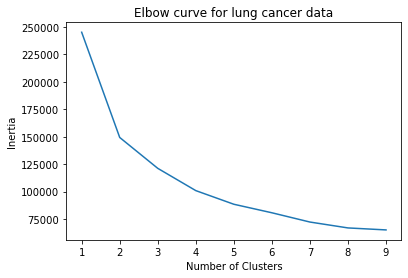

In [22]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for lung cancer data')
plt.show()

In [23]:
def get_clusters(k, data):
    model = KMeans(n_clusters=k, random_state=0)

    model.fit(data)

    predictions = model.predict(data)

    data['class'] = model.labels_

    return data

In [24]:
# Analyzing clusters witht the best value of k

clusters = get_clusters(5, df)

In [25]:
clusters

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,class
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,2
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,3
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,1
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,1
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,1
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,1
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,4
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,4


In [30]:
def show_clusters(df):
    plt.scatter(df['Wheezing'], df['Shortness of Breath'], c=df['class'])
    plt.xlabel('Wheezing')
    plt.ylabel('Shortness of Breath')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


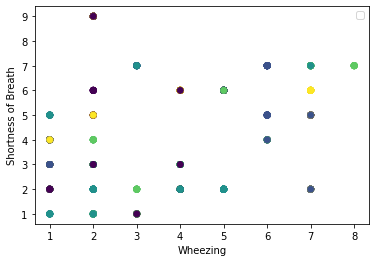

In [29]:
show_clusters(clusters)